In [ ]:
# TODO popuniti kodom za problem 3b

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving iris.csv to iris.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['iris.csv']))
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
train_df = pd.concat([df[df['species'] == cls].iloc[:40] for cls in df['species'].unique()])
test_df = pd.concat([df[df['species'] == cls].iloc[40:] for cls in df['species'].unique()])

In [ ]:
X_train = train_df[['sepal_length', 'sepal_width']].values
y_train = train_df['species'].values
X_test = test_df[['sepal_length', 'sepal_width']].values
y_test = test_df['species'].values

In [ ]:
class_map = {label: idx for idx, label in enumerate(np.unique(y_train))}
y_train_encoded = np.array([class_map[label] for label in y_train])
y_test_encoded = np.array([class_map[label] for label in y_test])

In [ ]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

In [ ]:
def predict_knn(X_train, y_train, x_query, k):
    distances = euclidean_distance(X_train, x_query)
    nearest_indices = distances.argsort()[:k]
    nearest_labels = y_train[nearest_indices]
    values, counts = np.unique(nearest_labels, return_counts=True)
    return values[np.argmax(counts)]

In [ ]:
k_values = list(range(1, 16))
accuracies = []

In [ ]:
for k in k_values:
    y_pred = np.array([predict_knn(X_train, y_train_encoded, x, k) for x in X_test])
    acc = np.mean(y_pred == y_test_encoded)
    accuracies.append(acc)
    print(f"k = {k}, accuracy = {acc:.2f}")

k = 1, accuracy = 0.63
k = 2, accuracy = 0.63
k = 3, accuracy = 0.67
k = 4, accuracy = 0.60
k = 5, accuracy = 0.80
k = 6, accuracy = 0.67
k = 7, accuracy = 0.70
k = 8, accuracy = 0.70
k = 9, accuracy = 0.77
k = 10, accuracy = 0.77
k = 11, accuracy = 0.80
k = 12, accuracy = 0.77
k = 13, accuracy = 0.83
k = 14, accuracy = 0.77
k = 15, accuracy = 0.83


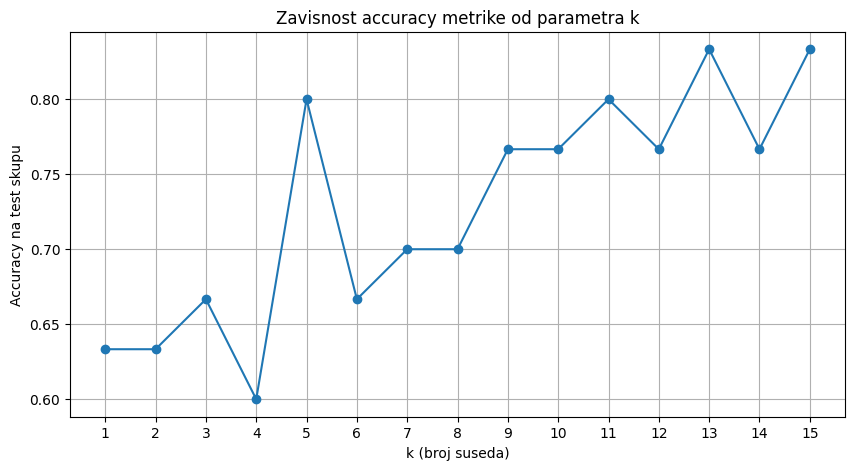

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o')
plt.xticks(k_values)
plt.xlabel("k (broj suseda)")
plt.ylabel("Accuracy na test skupu")
plt.title("Zavisnost accuracy metrike od parametra k")
plt.grid(True)
plt.show()

Na osnovu prikazanog grafikona i ispisanih tačnosti, možemo da vidimo kako se
accuracy menja u zavisnosti od broja suseda k.

Najniža tačnost je primećena za k=4 (60%), a najviša za k=13 i k=15 (83%).
Za mala k, model je osetljiv na šum i može doći do preučenja.
Za veća k, model uzima u obzir više primera i postaje robusniji, ali može izgubiti na lokalnoj preciznosti.
U ovom slučaju, k=13 ili k=15 daju najbolji rezultat, pa su najbolji izbor za ovaj skup podataka.
